### Treditional ML programming

Rules --------->
                   Traditional programming   -------> Answers
Data  --------->

We will use Auto- Encoder

input --> Encoder --bottleneck-- Decfoder --->Reconstructed input

In [19]:
!pip install tensorflow

     ------------------------------------ 455.9/455.9 MB 786.4 kB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 14.7/14.7 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 438.7/438.7 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.0 MB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 891.1 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 93

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.23.4 which is incompatible.
mlflow 1.28.0 requires importlib-metadata!=4.7.0,<5,>=3.7.0, but you have importlib-metadata 5.0.0 which is incompatible.


In [23]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import accuracy_score,precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,losses
from tensorflow.keras.models import Model

In [30]:
data = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = data.values
data.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [32]:
data.shape

(4998, 141)

In [33]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,-0.262502,-1.649828,-2.492623,-3.119754,-3.167656,-2.866306,-2.272845,-1.797754,-1.409784,-0.935806,...,0.071312,-0.062622,-0.276086,-0.507750,-0.761323,-0.835173,-0.642739,-0.487667,-0.706574,0.584034
std,1.152450,1.445542,1.386457,1.302921,1.104535,0.906312,0.731594,0.622794,0.636863,0.657788,...,1.404425,1.646105,1.894515,2.059366,2.086130,2.056296,1.859409,1.831088,1.414414,0.492937
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227,0.000000
25%,-1.004220,-2.701936,-3.668585,-4.227337,-4.007630,-3.480666,-2.779832,-2.165808,-1.773870,-1.362003,...,-1.087720,-1.588237,-2.146835,-2.730750,-3.031224,-2.868603,-2.154560,-1.658289,-1.596809,0.000000
50%,-0.297541,-1.661892,-2.586129,-3.388210,-3.469899,-2.947061,-2.285427,-1.750084,-1.422457,-0.910384,...,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.568443,1.000000
75%,0.499909,-0.677998,-1.514187,-2.235690,-2.531153,-2.398797,-1.823480,-1.484107,-1.063592,-0.476477,...,1.169392,1.238651,1.264379,1.234408,1.033957,0.945027,0.951621,1.002628,0.271635,1.000000
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103,1.000000


In [34]:
#No null values present in the dataset
data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
136    0
137    0
138    0
139    0
140    0
Length: 141, dtype: int64

In [35]:
#the data distribution is fine with this  we can proceed with next step
data[140].value_counts()

1.0    2919
0.0    2079
Name: 140, dtype: int64

In [40]:
#The last element contains the labels
y =  raw_data[:,-1]
x  = raw_data[:,0:-1]
print(x.shape)
print(y.shape)


(4998, 140)
(4998,)


In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=20)

#Lets normalize the data to [0,1]


Why?

If  we see the data we will see all the data points are within the range
it' not exceeding so much when we described the data points.
so it's better to do normalization instead of standardization

In [42]:
min_val = tf.reduce_min(x_train)
max_val  = tf.reduce_max(x_train)

x_train  = (x_train - min_val)/(max_val-min_val)
x_test = (x_test  - min_val)/(max_val - min_val)

x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

In [43]:
print(x_test)
print('*'*30)
print(x_train)

tf.Tensor(
[[0.3502566  0.24661346 0.19242744 ... 0.40989444 0.44995546 0.3700914 ]
 [0.57995987 0.55477434 0.5053508  ... 0.20939744 0.1761409  0.26232898]
 [0.39622223 0.21351328 0.19759385 ... 0.5077052  0.5631558  0.408927  ]
 ...
 [0.43882617 0.37433755 0.3583074  ... 0.472455   0.4778796  0.53337705]
 [0.5113273  0.4201929  0.30628031 ... 0.586353   0.57316905 0.45521107]
 [0.57785213 0.5776861  0.4664794  ... 0.5923148  0.5150229  0.554327  ]], shape=(1000, 140), dtype=float32)
******************************
tf.Tensor(
[[0.43879476 0.32746157 0.27434567 ... 0.37399694 0.44949195 0.4590834 ]
 [0.593032   0.54894906 0.38453105 ... 0.4442239  0.48170328 0.48673385]
 [0.45763716 0.4044475  0.3646264  ... 0.3914462  0.45786342 0.5168368 ]
 ...
 [0.5813306  0.4657199  0.3299934  ... 0.511459   0.4499246  0.49366623]
 [0.59444827 0.53831697 0.47930068 ... 0.5150644  0.49196804 0.5298829 ]
 [0.48858762 0.29838023 0.25782186 ... 0.5147629  0.5507658  0.5590876 ]], shape=(3998, 140), dtyp

In [ ]:
#We will train the autoencoder by using only the normal rhythms, which are labeled
#In the data set as 1, seperate te normal rhythms from the abnormal  one

In [98]:
y_train = y_train.astype(bool)
y_test = y_test.astype(bool)

normal_train_data = x_train[y_train]
normal_test_data = x_test[y_test]

anomalous_train_data = x_train[~y_train]
anomalous_test_data = x_test[~y_test]

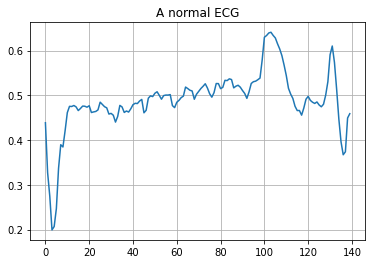

In [49]:
#Plot the ECG for normal

plt.grid()
plt.plot(np.arange(140),normal_train_data[0])
plt.title('A normal ECG')
plt.show()

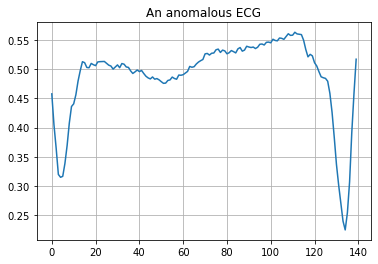

In [50]:
#Abnormal ECG

plt.grid()
plt.plot(np.arange(140),  anomalous_train_data[0])
plt.title("An anomalous ECG")
plt.show()

In [87]:
#Building the model
class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Dense(32, activation ="relu"),
            layers.Dense(16, activation="relu"),
            layers.Dense(8, activation="relu")])     
        self.decoder = tf.keras.Sequential([
            layers.Dense(16, activation="relu"),
            layers.Dense(32, activation="relu"),
            layers.Dense(140, activation="sigmoid")])      
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
autoencoder = AnomalyDetector()

In [88]:
autoencoder.compile(optimizer="adam", loss="mae")

In [89]:
#The auto encoder is trained using normal ECG, but its evaluated using full data set

history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(x_test, x_test),
          shuffle=True)

Epoch 1/20
5/5 [==============================] - 1s 43ms/step - loss: 0.0459 - val_loss: 0.0432
Epoch 2/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0435 - val_loss: 0.0420
Epoch 3/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0411 - val_loss: 0.0403
Epoch 4/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0382 - val_loss: 0.0390
Epoch 5/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0352 - val_loss: 0.0375
Epoch 6/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0323 - val_loss: 0.0363
Epoch 7/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0299 - val_loss: 0.0355
Epoch 8/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0278 - val_loss: 0.0349
Epoch 9/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0263 - val_loss: 0.0342
Epoch 10/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0251 - val_loss: 0.0336
Epoch 11/20
5/5 [============

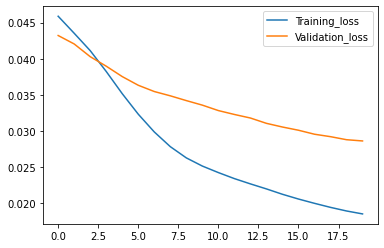

In [90]:
plt.plot(history.history["loss"], label="Training_loss")
plt.plot(history.history["val_loss"], label="Validation_loss")
plt.legend(loc=0)

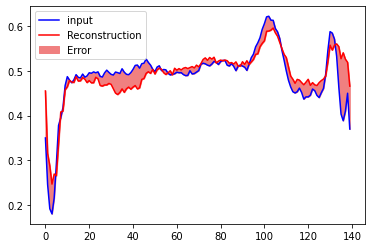

In [99]:
#For normal data
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0],'b')
plt.plot(decoded_data[0],'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["input", "Reconstruction", "Error"])
plt.show()

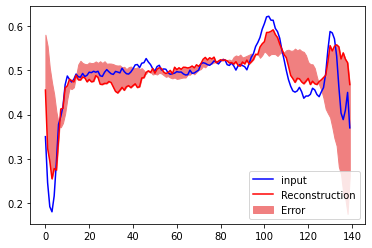

In [101]:
#For normal data
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0],'b')
plt.plot(decoded_data[0],'r')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["input", "Reconstruction", "Error"])
plt.show()

73/73 [==============================] - 0s 1ms/step


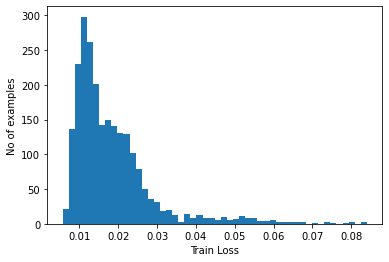

In [104]:
#Lets detect anomalies


reconstruction = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstruction, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train Loss")
plt.ylabel("No of examples")
plt.show()

In [105]:
#Lest choose the threshold value that is one standaed deviation above the mean

threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold : ", threshold)

Threshold :  0.02881103


13/13 [==============================] - 0s 2ms/step


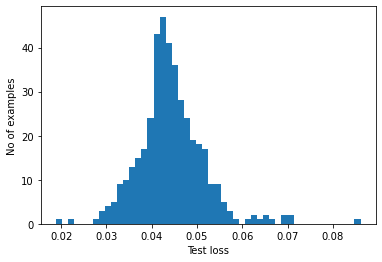

In [106]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [108]:
#Classify an ECG as an anomaly if the reconstruction error is greater than the threshold

def predict(model, data, threshold):
    reconstructions = model(data)
    loss = tf.keras.losses.mae(reconstructions, data)
    return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
    print("Accuracy = {}".format(accuracy_score(labels, predictions)))
    print("Precision = {}".format(precision_score(labels, predictions)))
    print("Recall = {}".format(recall_score(labels, predictions)))


In [111]:
preds = predict(autoencoder,x_test,threshold)
print_stats(preds,y_test)

Accuracy = 0.955
Precision = 0.990909090909091
Recall = 0.9316239316239316
